<a href="https://colab.research.google.com/github/MikeyBoo/pyNbody-Notebook/blob/main/My_pyNbody_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r ./drive/MyDrive/testdata ./


In [3]:
!ls

drive  sample_data  testdata


In [4]:
pip install pynbody

     |████████████████████████████████| 7.1 MB 4.7 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
  Created wheel for posix-ipc: filename=posix_ipc-1.0.5-cp37-cp37m-linux_x86_64.whl size=46242 sha256=89d3abf0dec095e8726c51892ac714cb1991b66a99fe35ce24a586ddabeb2c65
  Stored in directory: /root/.cache/pip/wheels/6d/7d/f7/c43f10dfa623ec454eb6b6f92a06e3502b301ec59e506deee3
Successfully built posix-ipc


In [5]:
import pynbody

In [6]:
import pylab

In [7]:
s = pynbody.load('testdata/g15784.lr.01024.gz')

In [8]:
h = s.halos()

In [9]:
h1 = h[1]

In [10]:
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [11]:
pynbody.analysis.halo.center(h1,mode='hyb')

In [12]:
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [13]:
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [14]:
h5 = h[5]

In [15]:
my_h5_transform = pynbody.analysis.halo.center(h5, mode='hyb', move_all=False)

In [16]:
print(h[1]['pos'][0]) # should be unchanged

[-0.00091396 -0.00044043 -0.00365958]


In [17]:
print(h5['pos'][0]) # should be changed

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [18]:
my_h5_transform.revert()

In [19]:
print(h5['pos'][0]) # back to where it started

[-0.00092652  0.00130131 -0.00042332]


In [20]:
print(h[1]['pos'][0]) # still hasn't changed, of course

[-0.00091396 -0.00044043 -0.00365958]


In [21]:
with pynbody.analysis.halo.center(h[5], mode='hyb'): print(h[5]['pos'][0])

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [22]:
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [23]:
s = pynbody.load('testdata/g15784.lr.01024.gz'); h1 = s.halos()[1];

In [24]:
cen_hyb = pynbody.analysis.halo.center(h1,mode='hyb',retcen=True)

In [25]:
cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

In [26]:
print(cen_hyb)

[ 0.02445621 -0.03411364 -0.12243623]


In [27]:
print(cen_pot)

[ 0.02445719 -0.03411397 -0.12243643]


In [28]:
s['pos'] -= cen_hyb

In [29]:
s.physical_units()

SimArray([[10263.511, 10323.97 , 10384.43 , ..., 10334.826, 10254.129,
           10173.432],
          [10342.602, 10403.281, 10463.959, ..., 10356.803, 10276.174,
           10195.545],
          [10421.694, 10482.592, 10543.489, ..., 10378.778, 10298.219,
           10217.658],
          ...,
          [ 9527.131,  9636.182,  9745.233, ...,  9798.587,  9780.066,
            9761.545],
          [ 9500.557,  9605.702,  9710.848, ...,  9792.068,  9774.049,
            9756.029],
          [ 9473.983,  9575.222,  9676.462, ...,  9785.549,  9768.031,
            9750.514]], dtype=float32, 'Msol kpc**-3')

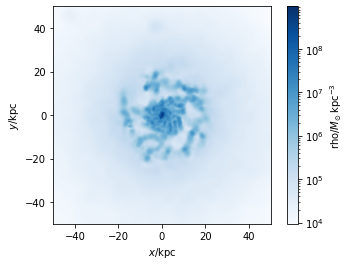

In [30]:
pynbody.plot.image(h1.g, width=100, cmap='Blues')

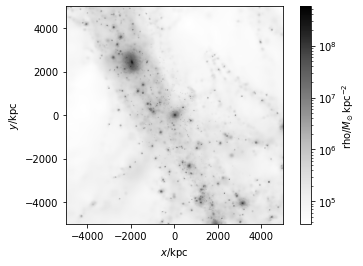

In [31]:
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')], width='10 Mpc', units = 'Msol kpc^-2', cmap='Greys');

In [32]:
pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))

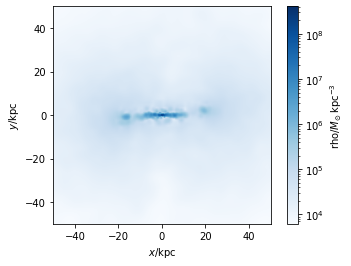

In [33]:
pynbody.plot.image(h1.g, width=100, cmap='Blues');

In [34]:
s.rotate_x(90)

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


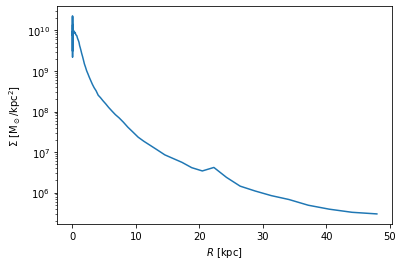

In [35]:
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')
pylab.clf()
pylab.plot(ps['rbins'], ps['density']);
pylab.semilogy();
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


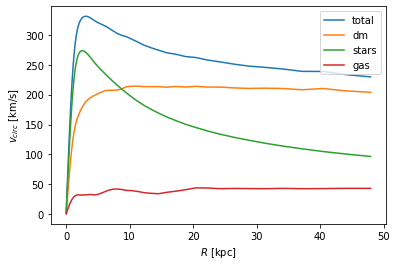

In [36]:
pylab.figure()
pd = pynbody.analysis.profile.Profile(h1.d,min=.01,max=50, type = 'log')
pg = pynbody.analysis.profile.Profile(h1.g,min=.01,max=50, type = 'log')
p = pynbody.analysis.profile.Profile(h1,min=.01,max=50, type = 'log')
for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : pylab.plot(prof['rbins'],prof['v_circ'],label=name)
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$v_{circ}$ [km/s]');
pylab.legend()

In [37]:
f = pynbody.load("testdata/test_g2_snap")

In [38]:
len(f)

8192

In [39]:
f.families()

[<Family gas>, <Family dm>, <Family star>]

In [40]:
len(f.dm)

4096

In [41]:
len(f.gas)

4039

In [42]:
len(f.star)

57

In [43]:
f.properties

{'a': 0.2777777798158637,
 'boxsize': Unit("3.00e+03 kpc a h**-1"),
 'h': 0.71,
 'omegaL0': 0.7331,
 'omegaM0': 0.2669,
 'time': Unit("3.55e+00 s kpc a**1/2 h**-1 km**-1")}

In [44]:
f.properties['a']

0.2777777798158637

In [45]:
f.keys()

[]

In [46]:
f.loadable_keys()

['mass', 'vel', 'pos', 'iord']

In [47]:
f['pos']

SimArray([[  53.318974,  177.84364 ,  128.22311 ],
          [ 306.75046 ,  140.44455 ,  215.37149 ],
          [ 310.99908 ,   64.1345  ,  210.53595 ],
          ...,
          [2870.9016  , 2940.1711  , 1978.7949  ],
          [2872.4114  , 2939.2197  , 1983.916   ],
          [2863.6511  , 2938.0544  , 1980.0615  ]], dtype=float32, 'kpc a h**-1')

In [48]:
f.gas.loadable_keys()

['mass',
 'vel',
 'nhe',
 'smooth',
 'sfr',
 'pos',
 'nh',
 'nheq',
 'nhep',
 'nhp',
 'rho',
 'iord',
 'u']

In [49]:
f.gas['rho']

SimArray([1.3888609e-09, 3.3617684e-09, 4.5273674e-09, ..., 8.5340952e-09,
          7.4101774e-09, 1.4051752e-09], dtype=float32, '1.00e+10 h**2 Msol a**-3 kpc**-3')

SimArray([[6.6544048e-28, 6.6955696e-28, 6.7367335e-28, ...,
           7.4328464e-28, 7.4019906e-28, 7.3711348e-28],
          [6.6723111e-28, 6.7121461e-28, 6.7519801e-28, ...,
           7.4302560e-28, 7.4002910e-28, 7.3703259e-28],
          [6.6902174e-28, 6.7287226e-28, 6.7672267e-28, ...,
           7.4276656e-28, 7.3985918e-28, 7.3695170e-28],
          ...,
          [6.3616085e-28, 6.4677610e-28, 6.5739144e-28, ...,
           6.4213904e-28, 6.4206219e-28, 6.4198535e-28],
          [6.3110240e-28, 6.4134984e-28, 6.5159718e-28, ...,
           6.3841833e-28, 6.3846523e-28, 6.3851222e-28],
          [6.2604404e-28, 6.3592353e-28, 6.4580307e-28, ...,
           6.3469753e-28, 6.3486831e-28, 6.3503910e-28]], dtype=float32, 'g cm**-3')

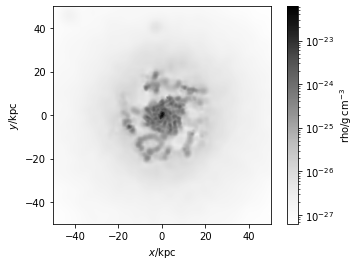

In [50]:
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

#create a simple slice of gas density
sph.image(h[1].g,qty="rho",units="g cm^-3",width=100,cmap="Greys")

SimArray([[0.00028574, 0.00028663, 0.00028751, ..., 0.00028522,
           0.0002843 , 0.00028338],
          [0.00028629, 0.00028718, 0.00028807, ..., 0.0002859 ,
           0.00028498, 0.00028406],
          [0.00028683, 0.00028773, 0.00028863, ..., 0.00028658,
           0.00028566, 0.00028474],
          ...,
          [0.00026118, 0.0002621 , 0.00026303, ..., 0.00027751,
           0.00027675, 0.000276  ],
          [0.00026035, 0.00026125, 0.00026215, ..., 0.00027697,
           0.00027622, 0.00027548],
          [0.00025951, 0.00026039, 0.00026127, ..., 0.00027643,
           0.0002757 , 0.00027496]], dtype=float32, 'g cm**-2')

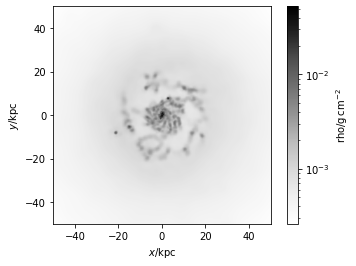

In [51]:
# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

#create an image of gas density integrated down the line of site (z axis)
sph.image(h[1].g,qty="rho",units="g cm^-2",width=100,cmap="Greys")

SimArray([[1750789.8, 1754961.1, 1758737.6, ..., 1741134.2, 1737059. ,
           1733752.8],
          [1748431.5, 1752181.5, 1759028.1, ..., 1741749.6, 1737866.9,
           1733901.5],
          [1747465.4, 1752519.8, 1757182.1, ..., 1743022.9, 1739244.5,
           1734707. ],
          ...,
          [1803891.4, 1809892.6, 1815553.5, ..., 1882375.6, 1876309.6,
           1871721.9],
          [1795115.9, 1801254.9, 1809181.5, ..., 1888521.2, 1883325.9,
           1877958.2],
          [1787071.9, 1794758.6, 1802286. , ..., 1895045.2, 1888552.8,
           1885402. ]], dtype=float32, 'K')

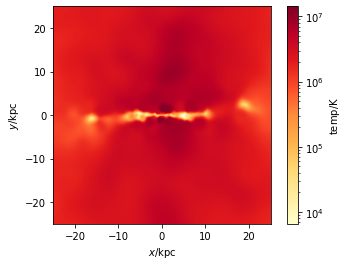

In [52]:
# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.sideon(h[1])

#create a simple slice showing the gas temperature
sph.image(h[1].g,qty="temp",width=50,cmap="YlOrRd", denoise=True,approximate_fast=False)

SimArray([[2.80733936e+03, 2.84564941e+03, 2.88395972e+03, ...,
           1.91307211e+00, 1.69086814e+00, 1.46866393e+00],
          [2.83623633e+03, 2.87456787e+03, 2.91289941e+03, ...,
           1.98871183e+00, 1.75894558e+00, 1.52917945e+00],
          [2.86513330e+03, 2.90348633e+03, 2.94183911e+03, ...,
           2.06435132e+00, 1.82702315e+00, 1.58969498e+00],
          ...,
          [9.46049951e-03, 1.11643225e-02, 1.28681455e-02, ...,
           6.66372363e+03, 6.77362305e+03, 6.88352197e+03],
          [7.09696440e-03, 8.53458419e-03, 9.97220445e-03, ...,
           6.61646875e+03, 6.71213574e+03, 6.80780273e+03],
          [4.73342929e-03, 5.90484682e-03, 7.07626343e-03, ...,
           6.56921387e+03, 6.65064844e+03, 6.73208301e+03]], dtype=float32, 'Msol kpc**-2')

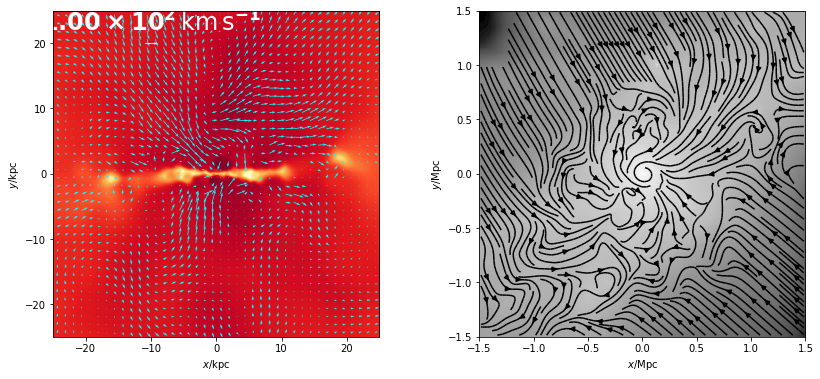

In [53]:
# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.sideon(h[1])

# create the subplots
f, axs = plt.subplots(1,2,figsize=(14,6))

#create a simple slice showing the gas temperature, with velocity vectors overlaid
sph.velocity_image(h[1].g, vector_color="cyan", qty="temp",width=50,cmap="YlOrRd", 
                   denoise=True,approximate_fast=False, subplot=axs[0], show_cbar = False)

#you can also make a stream visualization instead of a quiver plot
pynbody.analysis.angmom.faceon(h[1])
s['pos'].convert_units('Mpc')
sph.velocity_image(s.g, width='3 Mpc', cmap = "Greys_r", mode='stream', units='Msol kpc^-2', 
                   density = 2.0, vector_resolution=100, vmin=1e-1,subplot=axs[1], 
                   show_cbar=False, vector_color='black')

/usr/local/lib/python3.7/dist-packages/pynbody/snapshot/tipsy.py:1211: UserWarning: No log file found; reverting to guess-and-check
  warnings.warn('No log file found; reverting to guess-and-check')


No H2 data found in StarLog file


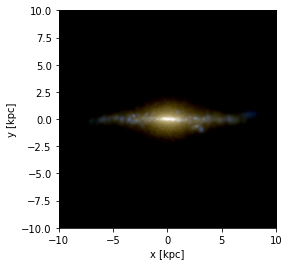

In [54]:
# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')
s.physical_units()

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.sideon(h[1])

#create an image using the default bands (i, v, u)
pynbody.plot.stars.render(s,width='20 kpc')

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '$\\rho_{DM}$ [M$_{\\odot}$ kpc$^{-3}$]')

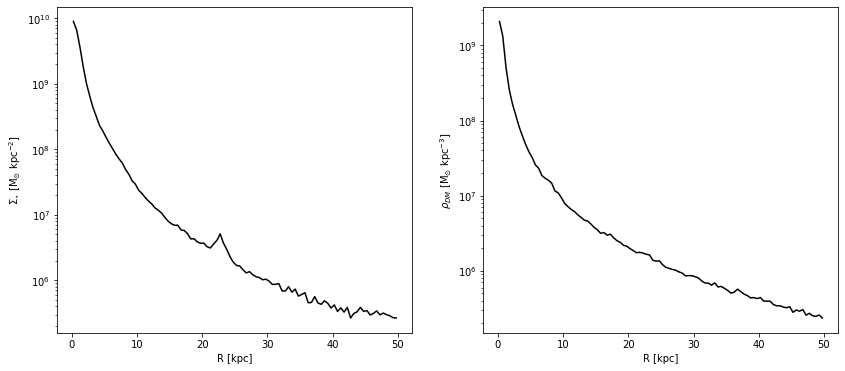

In [55]:
# load the snapshot and set to physical units
s = pynbody.load('testdata/g15784.lr.01024.gz')

# load the halos
h = s.halos()

# center on the largest halo and align the disk
pynbody.analysis.angmom.faceon(h[1])

# convert all units to something reasonable (kpc, Msol etc)
s.physical_units()

# create a profile object for the stars (by default this is a 2D profile)
p = pynbody.analysis.profile.Profile(h[1].s, vmin =.01, max=50)

# make the figure and sub plots
f, axs = plt.subplots(1,2,figsize=(14,6))

# make the plot
axs[0].plot(p['rbins'],p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(h[1].d,min=.01,max=50,ndim=3)

axs[1].plot(p['rbins'],p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')

/usr/local/lib/python3.7/dist-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


Text(0, 0.5, '[Fe/H]')

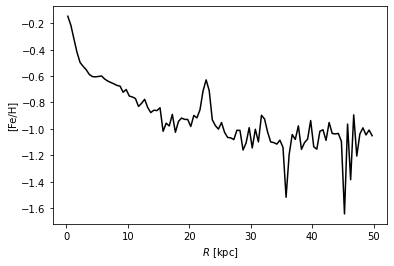

In [60]:
from pynbody.analysis import profile; import matplotlib.pylab as plt
s = pynbody.load('testdata/g15784.lr.01024'); s.physical_units()
h = s.halos()
pynbody.analysis.angmom.faceon(h[1])
p = profile.Profile(h[1].s, rmin='.01 kpc', rmax='50 kpc')
pdm_sph = profile.Profile(s.d, rmin = '.01 kpc', rmax = '250 kpc')
p.derivable_keys()
plt.plot(p['rbins'].in_units('kpc'),p['feh'],'k')
plt.xlabel('$R$ [kpc]'); plt.ylabel('[Fe/H]')